# Phase 3 Project Submission
---
- Name: Kai Cansler
- Student Pace: Flex
- Instructor: Mark Barbour
- Blog post URL: 

## Project Goal
---
### Stakeholders
SyriaTel Communications is a company that deals with Telecommunications. As our shareholder they are looking to predict customer churn with the efforts to prevent it. Customer churn is when a customer decides to cancel their service with SyriaTel Communications. Customer churn can be a big problem for companies that have a subscription or service based business model. Losing a customer can be a dip in our expected annual revenue as well as the inherent cost of customer acquisition. 

SyriaTel is looking to predict and prevent customer churn to manage the risks and costs of a subscription based business model.

### Data Understanding
We used the churn in telecoms dataset which was provided publicly on kaggle. This dataset contains 21 columns 3,333 rows. 

## Data Cleaning
___
First we want to understand our data and account for any missing information and make our data easier to work with.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from scipy import stats

In [2]:
# Import the data
df = pd.read_csv('telecom_churn_data.csv')
# Print first 5 rows
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

Looking at our initial data it looks like our target variable will be churn and the rest will be predictors. Next we want to understand what data types the columns contain and if any of them need to be changed or edited.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

We can see that our data contains 4 columns of categorical data. Of those 4 columns 2 of them can be converted to boolean data type for ease of processing. Phone number seems to just be an unique identifier and can be left out when building our model. There are also 16 numerical data types. Depending on the classifier model we use we may have to transform our data so that they have the same unit. 

There are also no missing values to deal with in the data set. 

In [5]:
# View number of unique values in state column
len(df['state'].unique())

51

In [6]:
# Check the balance of our target variable
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In [7]:
# Check count of churn and not churn 
df['churn'].value_counts(normalize=False)

False    2850
True      483
Name: churn, dtype: int64

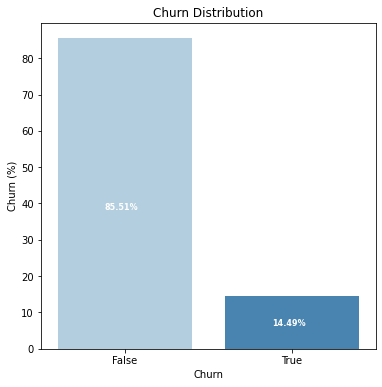

In [8]:
# Get churn distribution in our data
churn_dist = df['churn'].value_counts()/df['churn'].size * 100
churn_df = pd.DataFrame(churn_dist).reset_index()
# Plot churn distribution
plt.figure(figsize=(6,6))
ax = sns.barplot(x='index', y='churn', data=churn_df, palette='Blues')
ax.set_ylabel('Churn (%)')
ax.set_xlabel('Churn')
ax.set_title('Churn Distribution')
# Notate distribution on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.annotate('{:.2f}%'.format(height), (p.get_x()+ 0.35 * width, p.get_y()+ 0.45 * height),
                color = 'white', weight = 'bold', size = 8)

The distribution of churn data we find that 85.51% of the customers don't churn while 14.49% of the customers churn. If our model was to guess False 100% of the time then it would be correct roughly 85.51% of the time. We should aim for an accuracy higher than this mark.

### What could be some indicators for churn?
We will use a pairplot to look at the distribution of each of our variables.

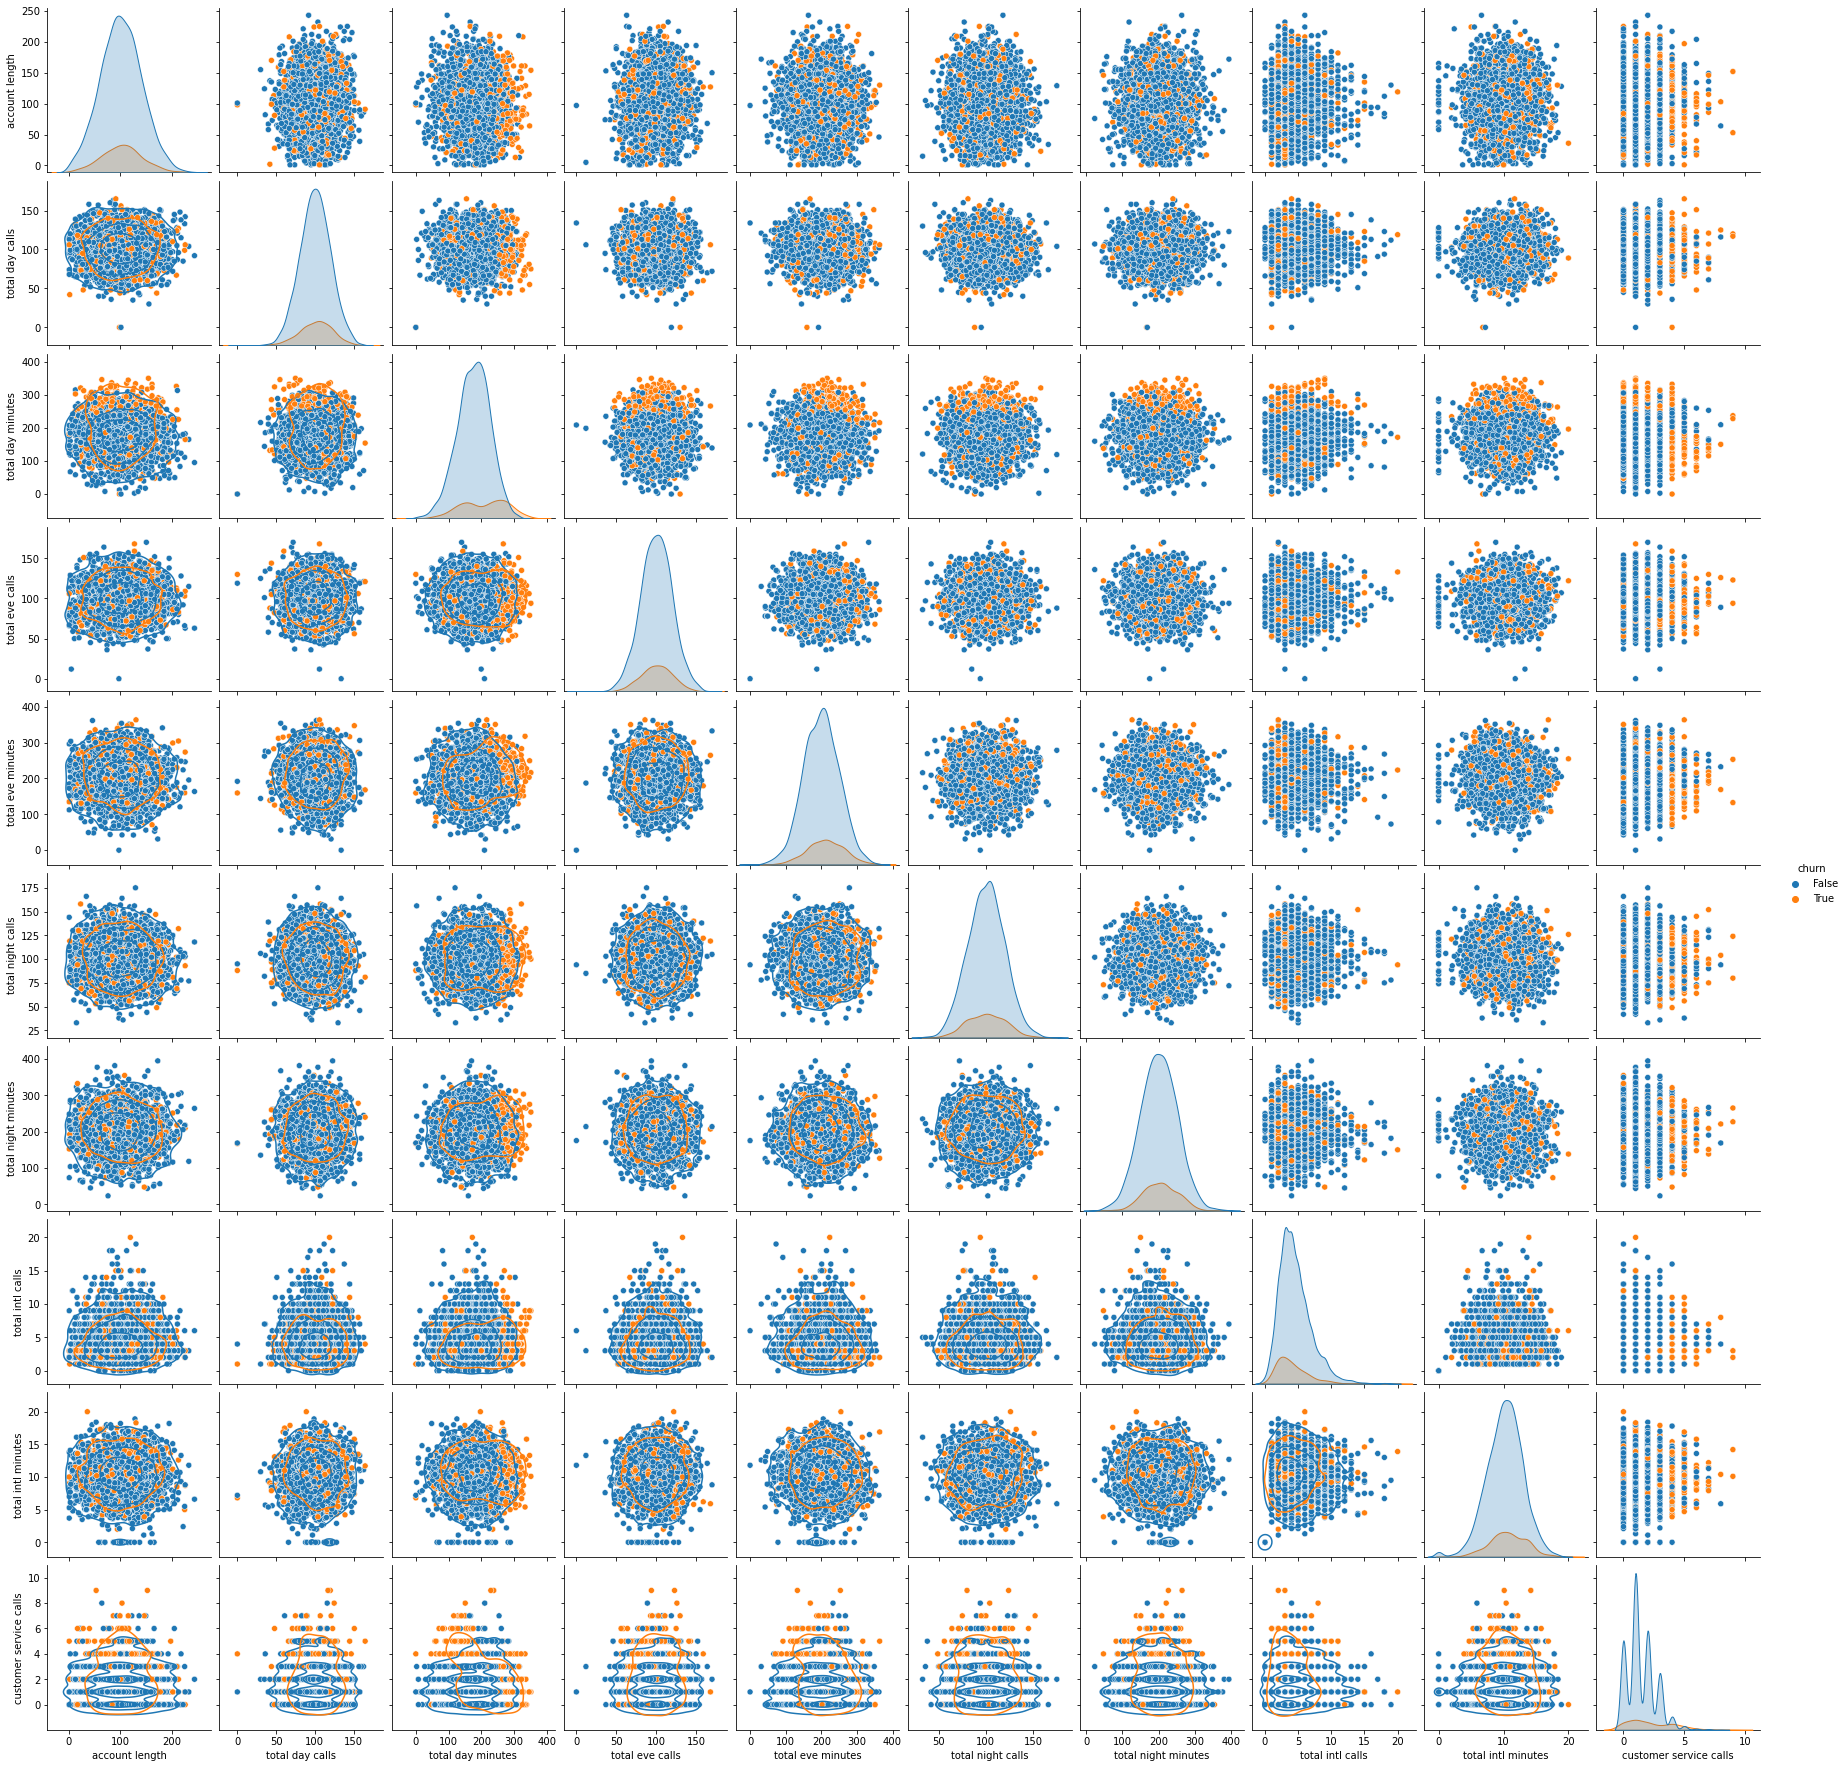

In [9]:
# collect our numerical data of interest
num_data_interest = df[['account length', 'total day calls', 'total day minutes',
                        'total eve calls', 'total eve minutes', 'total night calls', 
                        'total night minutes', 'total intl calls', 'total intl minutes', 
                        'customer service calls', 'churn']]
# Create pairplot to get overview of churn and each feature
g = sns.pairplot(num_data_interest, hue="churn")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Most of our variables seem to be normally distributed. There are 3 distributions that look to have a skew. Lets take a look at "total vmail messages", "total intl calls", and "customer service calls".

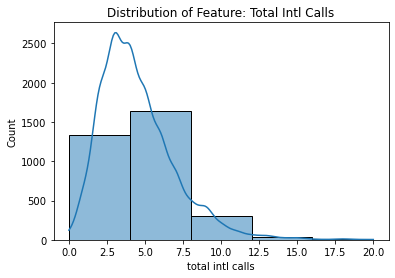

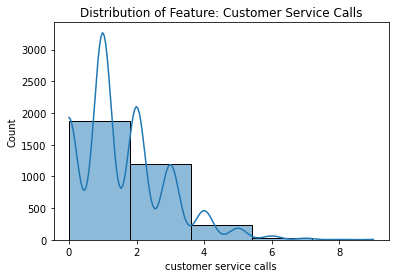

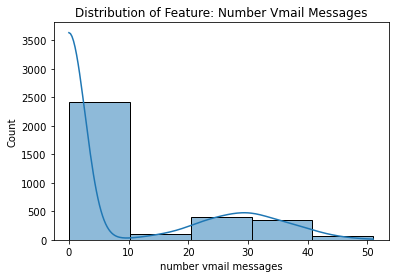

In [10]:
# Density distribution of variables
for col in ['total intl calls', 'customer service calls', 'number vmail messages']:
    sns.histplot(df[col], bins=5, kde=True)
    plt.title(f'Distribution of Feature: {col.title()}')
    plt.show()

We see that each of these have a strong right skew. There is some interesting things happening with the kernal density estimation for customer service calls and number of voice mail messages. 

## Exploratory Data Analysis
---
Maybe we can learn more about churn rate based on these variables? We want to understand how the volume of customer service calls can effect churn rate, what states have the highest churn rate, and lastly how our services effect churn rate.

Text(0.5, 1.0, 'Customer Service Calls & Churn')

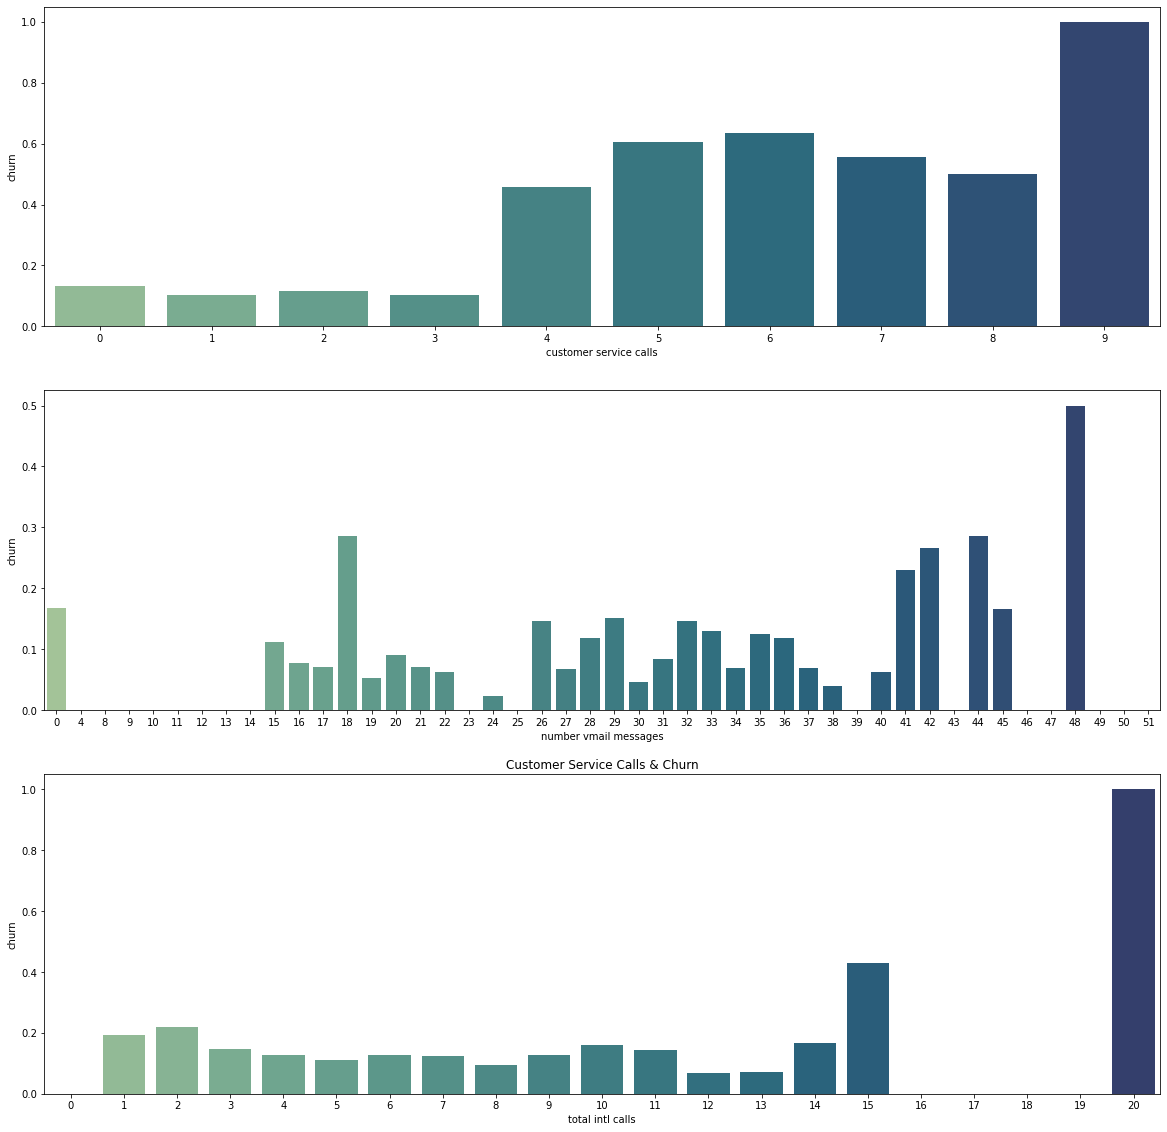

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(20,20))
ax[0] = sns.barplot(x='customer service calls', y='churn',
                    data=df, ax=ax[0], palette='crest', ci=None)
# Add annotations to bars

ax[1] = sns.barplot(x='number vmail messages', y='churn',
                    data=df,  ax=ax[1], palette='crest', ci=None)
ax[2] = sns.barplot(x='total intl calls', y='churn',
                    data=df, ax=ax[2], palette='crest', ci=None)
plt.title('Customer Service Calls & Churn')

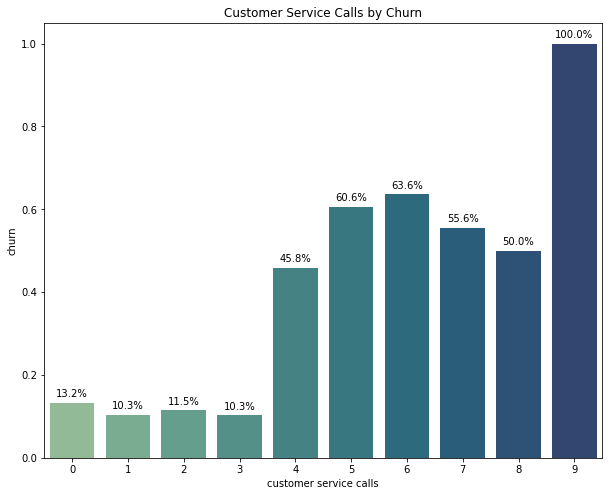

In [12]:
plt.subplots(figsize=(10,8))
ax = sns.barplot(x='customer service calls', y='churn',
                    data=df, palette='crest', ci=True)
ax.set_title('Customer Service Calls by Churn')
for p in ax.patches:
    ax.annotate(str(round(p.get_height()*100, 1))+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

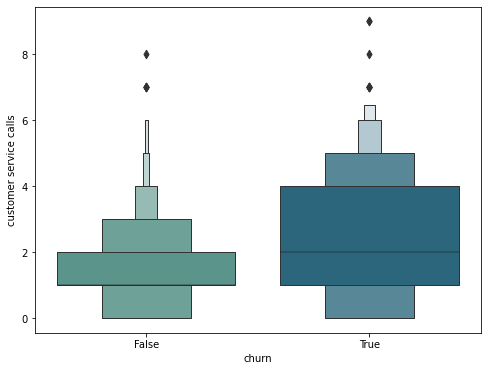

In [13]:
# Plot box plot of churn on customer service calls
plt.figure(figsize=(8,6))
sns.boxenplot(x='churn', y='customer service calls', data=df, palette='crest')
plt.show()

Wow! It seems that the higher number of customer service calls customers make the higher probability that they will churn. We can seem some correlation in number of vmail messages and total intl calls but most likely the number observations in those bins are too low to be significant.

###  How do customers vary by State?
I want to know if location may have an impact on churn as well as how they are as users. This may provide more insight onto our findings.

We will want to do some feature engineering as well as aggregating our data. 

In [14]:
# Turn "yes" and "no" answer columns to 1 for True and 0 for False.
# This is because when we group by we will get a probability for True.
df = df.replace({'yes':1, 'no':0})

In [16]:
# Function to find total calls and minutes
def create_totals(X):
    df_eda = X.copy()
    # Create total calls to for each observation
    df_eda['total calls'] = df_eda['total day calls'] + df_eda['total eve calls'] + df_eda['total night calls'] + df['total intl calls'] + df['customer service calls'] 
    # Create total minutes for each observation
    df_eda['total minutes'] = df_eda['total day minutes'] + df_eda['total eve minutes'] + df_eda['total night minutes'] + df['total intl minutes']
    return df_eda

# Create dataframe with added totals
df_eda = create_totals(df)

# group data on state and aggregate different features
calls_state = df_eda.groupby('state')['total calls'].mean().sort_values()
minutes_state = df_eda.groupby('state')['total minutes'].mean().sort_values()
churn_state = df_eda.groupby('state')['churn'].mean().sort_values()

# plot all our interested features grouped by state
fig, ax = plt.subplots(3, 1, figsize=(20,12))
sns.set_style("darkgrid",{"grid.color": ".6"})

calls_state.plot(kind='bar', ax=ax[0], rot=0,  color='yellowgreen')
ax[0].set_ylabel('total calls (avg)')
ax[0].set_ylim(270, 330)
minutes_state.plot(kind='bar', ax=ax[1], rot=0, color='darkcyan')
ax[1].set_ylabel('total minutes (avg)')
ax[1].set_ylim(400, 700)
churn_state.plot(kind='bar', ax=ax[2], rot=0, color='steelblue')
ax[2].set_ylabel('churn (prob)')


Text(0, 0.5, 'churn (prob)')

In [17]:
# Visualize Churn by State
sns.set_style("dark")
plt.figure(figsize=(18,6))
ax = churn_state.plot(kind='bar', rot=0, color='steelblue')
plt.title('Churn by State', fontsize=12)
ax.set_ylabel('Churn Percentage')

plt.hlines(y=0.265, xmin=0, xmax=51, color='orange')
plt.hlines(y=0.055, xmin=0, xmax=51, color='orange')

In [18]:
# Print top 3 and bottom 3 churn states
print("States with Highest Churn %:")
print(churn_state[-3:])
print("----------------------------")
print("States with Lowest Churn %:")
print(churn_state[:3])

States with Highest Churn %:
state
TX    0.250000
NJ    0.264706
CA    0.264706
Name: churn, dtype: float64
----------------------------
States with Lowest Churn %:
state
HI    0.056604
AK    0.057692
AZ    0.062500
Name: churn, dtype: float64


Georgia looks to have the highest in average total calls by state and South Dakota is the lowest. We also see that California has the largest churn rate compared to Hawaii which is the lowest. It might be notable to look into why our California churn rate is so high where as Hawaii is lower. Could it be due to competitors, service, ,sample size, or random chance.

In [19]:
# Visualize heatmap of churn by state
churn_map = churn_state.reset_index(name='churn rate')
fig = px.choropleth(data_frame=churn_map, locations='state', locationmode="USA-states",
                    color='churn rate', scope="usa", title='Churn Percentage by State',
                    color_continuous_scale='gnbu')
fig.show()

### Customer usage and Churn rate
Now that we saw how customers were on average by state lets take a deeper look at each individual user. We want to know how their usage of our services effect churn. 

Let's take a look at total minutes and how that effects churn rate!

In [20]:
# plot box plot of churn on total minutes
plt.figure(figsize=(12,6))
sns.boxenplot(x='churn', y='total minutes', data=df_eda, palette='crest')
plt.show()

In [21]:
# plot box plot of churn on total calls
plt.figure(figsize=(12,6))
sns.boxenplot(x='churn', y='total calls', data=df_eda, palette='crest')
plt.show()

In [22]:
# Encode international plan to aggregate and find normalized distribution
df_intl = df[df['international plan'] == 1]
df_no_intl = df[df['international plan'] == 0]
intl_churn = pd.DataFrame(df_intl['churn'].value_counts(normalize=True), columns=['churn'])
no_intl_churn = pd.DataFrame(df_no_intl['churn'].value_counts(normalize=True), columns=['churn'])

In [28]:
# Create barplot of International Plan and Churn
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(8,6), sharey=True)
sns.barplot(x=['False', 'True'], y='churn', data=intl_churn, ax=axes[0], palette='crest')
axes[0].set_title('International Plan: True')
sns.barplot(x=['False', 'True'], y='churn', data=no_intl_churn, ax=axes[1], palette='crest')
axes[1].set_title('International Plan: False')

Text(0.5, 1.0, 'International Plan: False')

In [29]:
# Compare rates for international calls for those with and without plan
df_intl['rate'] = df_intl['total intl charge'] / df_intl['total intl minutes']
print(df_intl[['rate']].describe())
df_no_intl['rate'] = df_no_intl['total intl charge'] / df_no_intl['total intl minutes']
print(df_no_intl['rate'].describe())

             rate
count  323.000000
mean     0.270038
std      0.000300
min      0.269231
25%      0.269801
50%      0.270000
75%      0.270259
max      0.271429
count    2992.000000
mean        0.270059
std         0.000332
min         0.268182
25%         0.269811
50%         0.270000
75%         0.270297
max         0.272727
Name: rate, dtype: float64


In [30]:
# Encode voice mail plan to find normalized distribution
df_vm = df[df['voice mail plan'] == 1]
df_no_vm = df[df['voice mail plan'] == 0]
vm_churn = pd.DataFrame(df_vm['churn'].value_counts(normalize=True), columns=['churn'])
no_vm_churn = pd.DataFrame(df_no_vm['churn'].value_counts(normalize=True), columns=['churn'])

Text(0.5, 1.0, 'Voice Mail Plan: False')

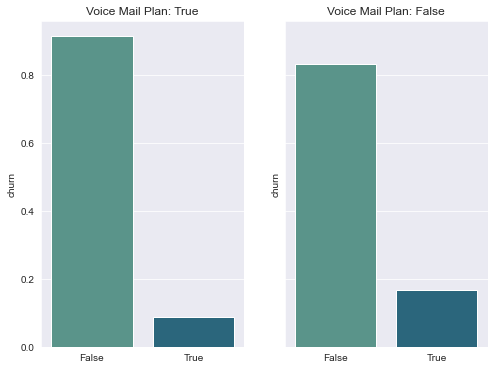

In [31]:
# Create bar chart to compare Voice Mail plan and Churn
fig, axes = plt.subplots(1, 2, figsize=(8,6), sharey=True)
sns.barplot(x=['False', 'True'], y='churn', data=vm_churn, ax=axes[0], palette='crest')
axes[0].set_title('Voice Mail Plan: True')
sns.barplot(x=['False', 'True'], y='churn', data=no_vm_churn, ax=axes[1], palette='crest')
axes[1].set_title('Voice Mail Plan: False')

Our findings about our userbase:
____
1. Users that churned had a slightly higher mean for total minutes.
2. The mean did not differ for total calls between those that churned and those that didn't.
3. Users that have international plan had a higher churn rate that those that didn't.
4. Users that had voice mail plan were less likely to churn that those that didn't.

Recommendation:
____
We should look into our offered plans to understand how we charge for minutes and applicable fees for high usage. Users that churned had higher minutes on average. To address this we can include possible unlimited plans, adjust our rates to be more favorable compared to competitors will be an advantage, or eliminate possible fees.

Our international plan users have a very high churn rate. This would be a great area to focus on our user experience first. What is it about our international plan that is not satisfactory to our clients? How can we change our plan to better our user experience.

Lastly, the voicemail plan is a great way to increase our user buy in. Those with voice mail plans have lower churn rate than those without. It looks to be a good service and we should find methods to increase our users with voice mail plan. Methods for this could be increasing our marketing around voice mail plans, offer discounts for sign up. 

## Data Modeling
---
Our goal is to use classification modelling to correctly identify clients that will churn. Because this is a classification problem there are possilbilities for False Positive and False Negative. 

When looking at how our model performs we want to use "Recall" as a metric as we do not want to miss a potential client who will churn and will not lose as much value engaging those who aren't going to churn.

In [32]:
# Import necessary packages for Modeling
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BaseEstimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaseEnsemble
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, confusion_matrix, recall_score, f1_score, accuracy_score, classification_report, roc_auc_score, make_scorer 
from imblearn.pipeline import make_pipeline, Pipeline

In [33]:
# Create a function to plot confusion matrix
def conf_matrix(y_true, y_pred):
    """
    Plots a standard confusion matrix in seaborn
    """
    cm = confusion_matrix(y_true, y_pred) # Create confusion matrix 
    # Plot confusion matrix
    plt.figure(figsize=(12,8)) 
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
# Create function to print results    
def print_results(y_train, y_pred_train, y_test, y_pred_test):
    print('Recall score for training set: ', round(recall_score(y_train,y_pred_train),4))
    print('Recall score for testing set: ', round(recall_score(y_test,y_pred_test),4))
    print('Accuracy score for testing set: ', round(accuracy_score(y_test,y_pred_test),4))
    print('F1 score for testing set: ', round(f1_score(y_test, y_pred_test),4))

We will be using multiple methods for our model including a linear model. Let's review linear dependencies between features as to deal with any collienarity that may effect our model.

In [34]:
# Create Dataframe of our numerical data for corr matrix
num_data = df.select_dtypes(include=np.number)
cr = num_data.corr(method='spearman') # calculate correlation matrix
# Plot our correlation matrix
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
sns.heatmap(cr, annot=True).set(title='Corr Matrix of Numeric Features')

[Text(0.5, 1.0, 'Corr Matrix of Numeric Features')]

Most of the features are not correlated but a few are perfectly correlated:
- Total day charge and total day minutes features are 1:1 positively correlated.
- Total eve charge and total eve minutes features are 1:1 positively correlated.
- Total night charge and total night minutes features are 1:1 positively correlated.
- Total int charge and total int minutes features are 1:1 positively correlated.
- voice mail plan and number vmail messages are 1:0.98 postively correlated.

This is expected as charge is a calulation directly from minutes.
The perfect correlation of 1 indicates multicollinearity. It does not have the same impact on non-linear models as it does on linear. Some nonlinear models are impacted by perfect multicollinearity whereas others are not.

We will remove total day, evening, and night "charge" while keeping "minutes" in our model to reduce multicollinearity.

Treat outliers:
- Method is to drop outliers past 3 standard deviations from the mean.

In [35]:
# List of all features we are interested in
chosen_features = ['state', 'area code', 'account length', 'international plan',  
                   'number vmail messages', 'total day minutes', 'total day calls', 
                   'total eve minutes', 'total eve calls', 'total night minutes',
                   'total night calls', 'total intl minutes', 'total intl calls', 
                   'customer service calls', 'voice mail plan']
target = ['churn']
# Create new X and Y of our important features
X = df[chosen_features] # Feature without target
X = create_totals(X)
y = df[target] # Just Target


In [36]:
scaler = MinMaxScaler()
def scaling(columns):
    return scaler.fit_transform(X[columns].values.reshape(-1,1))
for i in X.select_dtypes(include=[np.number]).columns:
    X[i] = scaling(i)

In [37]:
# One hot encoding
def dummy_X(X):
    dummy_state = pd.get_dummies(X["state"])
    dummy_area_code = pd.get_dummies(X["area code"])
    X_dummied = pd.concat([X,dummy_state,dummy_area_code],axis=1)
    X_dummied = X_dummied.loc[:, ~X_dummied.columns.duplicated()]
    X_dummied = X_dummied.drop(['state','area code'], axis=1)
    return X_dummied
X_dummied = dummy_X(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_dummied, y, random_state=42) # Test size auto .25
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42) # Validation Set

In [39]:
# Apply SMOTE
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_re, y_train_re = sm.fit_resample(X_train, y_train)
# Take a look at both X and y sets to confirm they have the same shape.
print('Before Oversampling, the shape of X_train: {}'.format(X_train.shape))
print('Before Oversampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After Oversampling, the shape of X_train_over: {}'.format(X_train_re.shape))
print('After Oversampling, the shape of y_train_over: {}'.format(y_train_re.shape))
y_train_re.value_counts()

Before Oversampling, the shape of X_train: (2499, 69)
Before Oversampling, the shape of y_train: (2499, 1)
After Oversampling, the shape of X_train_over: (4282, 69)
After Oversampling, the shape of y_train_over: (4282, 1)


churn
True     2141
False    2141
dtype: int64

In [40]:
# Model 1
# Instantiate Logistic Regression model and fitting the data
lr = LogisticRegression()
lr.fit(X_train_re, y_train_re) 

LogisticRegression()

In [41]:
# Prediction of test and train set with LogisticRegression
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train_re)

# Using our built functions to display model results
print('---- Logistic Regression Results ----')
print_results(y_train_re, y_pred_train, y_test, y_pred_test)
conf_matrix(y_test, y_pred_test)

---- Logistic Regression Results ----
Recall score for training set:  0.8445
Recall score for testing set:  0.6117
Accuracy score for testing set:  0.808
F1 score for testing set:  0.5122


In [42]:
# Model 2
# Instantiate Random Forest model and fitting the data
rf = RandomForestClassifier()
rf.fit(X_train_re, y_train_re)

RandomForestClassifier()

In [43]:
# Prediction of the train and test set with Random Forest
y_pred_train = rf.predict(X_train_re)
y_pred_test = rf.predict(X_test)

# Using our built functions to display model results
print('---- Random Forest Results ----')
print_results(y_train_re, y_pred_train, y_test, y_pred_test)
conf_matrix(y_test, y_pred_test)

---- Random Forest Results ----
Recall score for training set:  1.0
Recall score for testing set:  0.8058
Accuracy score for testing set:  0.9472
F1 score for testing set:  0.8342


In [44]:
# Model 3
# Instantiate Decision Tree model and fitting the data
dt = DecisionTreeClassifier()
dt.fit(X_train_re, y_train_re)

DecisionTreeClassifier()

---- Decision Tree Results ----
Recall score for training set:  1.0
Recall score for testing set:  0.767
Accuracy score for testing set:  0.9072
F1 score for testing set:  0.7315


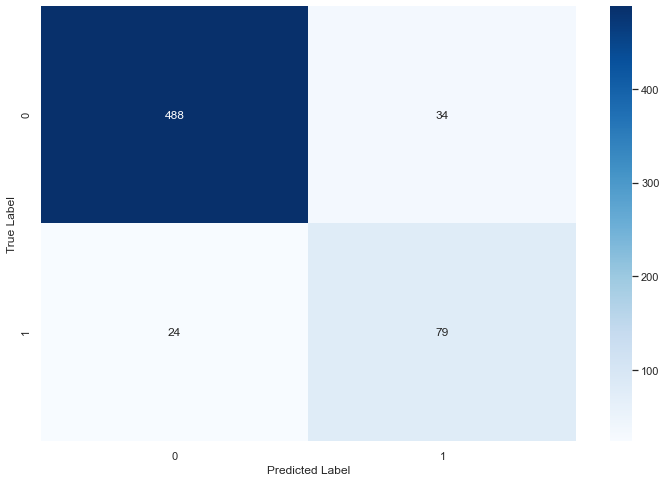

In [45]:
# Prediction of the train and test set with Decision Tree
y_pred_train = dt.predict(X_train_re)
y_pred_test = dt.predict(X_test)

# Using our built functions to display model results
print('---- Decision Tree Results ----')
print_results(y_train_re, y_pred_train, y_test, y_pred_test)
conf_matrix(y_test, y_pred_test)

In [46]:
# Model 4
# Instantiate K-Nearest-Neighbors model and fitting the data
knn = KNeighborsClassifier()
knn.fit(X_train_re, y_train_re)

KNeighborsClassifier()

---- K Neighbors Results ----
Recall score for training set:  0.964
Recall score for testing set:  0.5243
Accuracy score for testing set:  0.7104
F1 score for testing set:  0.3737


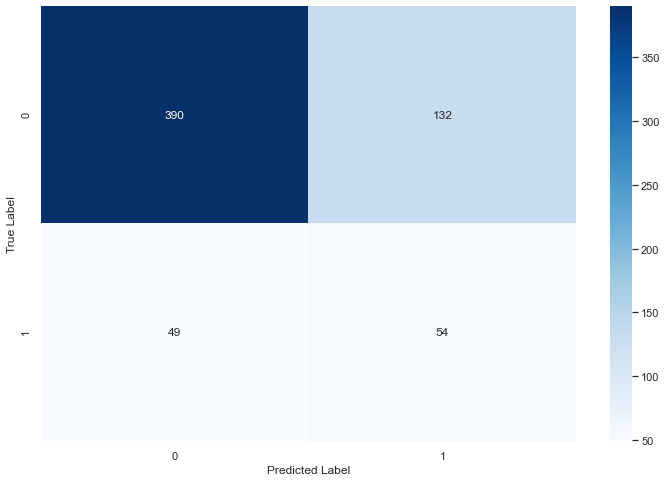

In [47]:
# Prediction of the train and test set with K-Nearest-Neighbors model
y_pred_train = knn.predict(X_train_re)
y_pred_test = knn.predict(X_test)

# Using our built functions to display model results
print('---- K Neighbors Results ----')
print_results(y_train_re, y_pred_train, y_test, y_pred_test)
conf_matrix(y_test, y_pred_test)

In [48]:
# Model 5
# Instantiate Gradient Boosting model and fitting the data.
gb = GradientBoostingClassifier()
gb.fit(X_train_re, y_train_re)

GradientBoostingClassifier()

In [49]:
# Prediction of the train and test set with GradientBoosting model
y_pred_train = gb.predict(X_train_re)
y_pred_test = gb.predict(X_test)

# Using our built functions to display model results
print('---- Gradient Boost Results ----')
print_results(y_train_re, y_pred_train, y_test, y_pred_test)
conf_matrix(y_test, y_pred_test)

---- Gradient Boost Results ----
Recall score for training set:  0.9505
Recall score for testing set:  0.8447
Accuracy score for testing set:  0.9488
F1 score for testing set:  0.8447


In [50]:
# Model 6
gnb = GaussianNB()
gnb.fit(X_train_re, y_train_re)

GaussianNB()

---- GaussianNB results ----
Recall score for training set:  0.8435
Recall score for testing set:  0.5437
Accuracy score for testing set:  0.608
F1 score for testing set:  0.3137


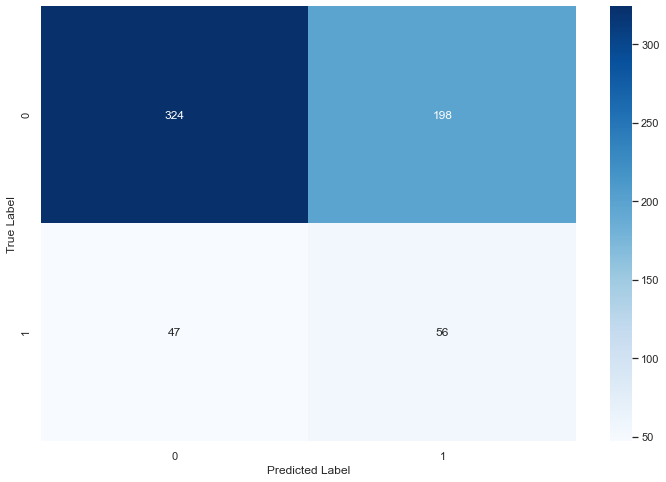

In [51]:
# Predict with GaussianNB model on Train and Test Set
y_pred_train = gnb.predict(X_train_re)
y_pred_test = gnb.predict(X_test)
# Print Results
print('---- GaussianNB results ----')
print_results(y_train_re, y_pred_train, y_test, y_pred_test)
conf_matrix(y_test, y_pred_test)

GradientBoost performed the best out of all the baseline models.

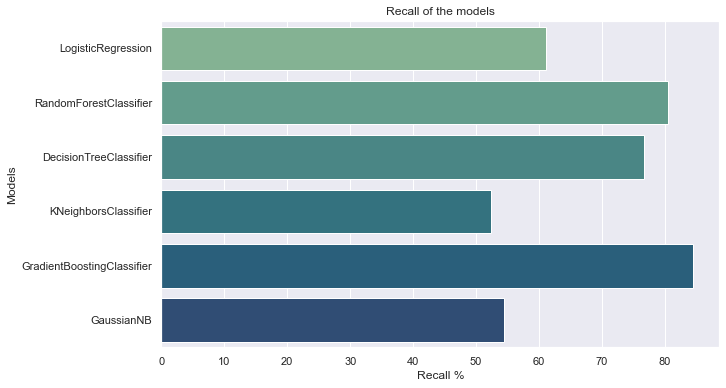

In [52]:
# List of baseline models
models = [lr,rf,dt,knn,gb,gnb]
# Create dataframe of baseline results
result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

# Iterate and append results data to dataframe
for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)    
    result = pd.DataFrame([[names, recall*100]], columns= ["Models","Recall"])
    results = results.append(result)
# Plot the results bar graph    
plt.figure(figsize=[10,6])
sns.barplot(x= 'Recall', y = 'Models', data=results, palette="crest")
plt.xlabel('Recall %')
plt.title('Recall of the models');

Recall is scoring method that is valued the highest for our business goal. Looking ath te graph the baseline model with the highest recall score is the GradientBoostingClassifier with RandomForestClassifier being a close second. 

Let's take a look at the ROC curve of each of our classifiers to get another perspective on their individual performance. 

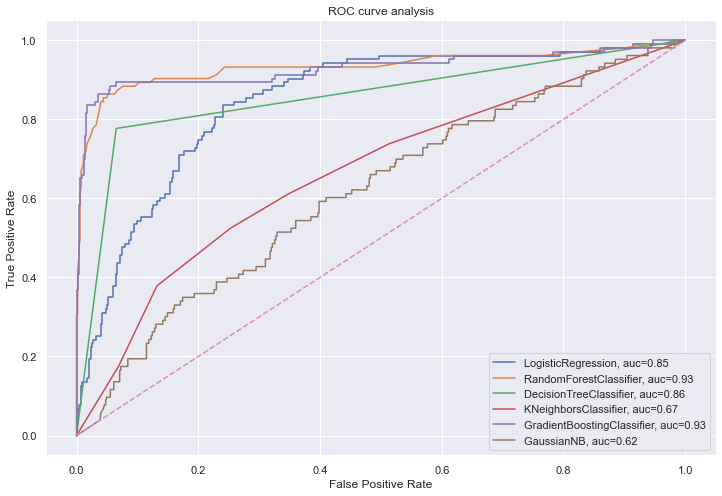

In [53]:
# List of Classifiers to plot ROC
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               KNeighborsClassifier(),
               GradientBoostingClassifier(),
               GaussianNB()]

# Put the results in a DataFrame
result_df = pd.DataFrame(columns=['classifier', 'fpr', 'tpr', 'auc'])

# Train models and save the result
for classifier in classifiers:
    model = classifier.fit(X_train_re, y_train_re)
    y_prob = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    
    result_df = result_df.append({'classifier':classifier.__class__.__name__,
                                 'fpr':fpr,
                                 'tpr':tpr,
                                 'auc':auc}, ignore_index=True)
    
# Make index the name of the classifier
result_df.set_index('classifier', inplace=True)

fig = plt.figure(figsize=(12,8))

for i in result_df.index:
    plt.plot(result_df.loc[i]['fpr'],
            result_df.loc[i]['tpr'],
            label=f"{i}, auc={round(result_df.loc[i]['auc'],2)}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve analysis')
plt.legend()
plt.show()

Looking at the Receiver Operator Characteristic Curve we can see that the RandomForestClassifier and GradientBoostingClassifier performs the best. The more "Area under the Curve" the better the performance. The higher AUC score the more the model ranks random positive examples higher than random negative examples.

## Hyperparameter tuning for GradientBoostingClassifier
---
Now that we have found the best classifier based on the baseline models performances we can tune our model. We will be tuning through hyperparameters. The parameters we will look at are "loss", "n_estimators", "max_depth", and "max_featueres". 
1. loss is the loss function to be minimized in each split. We will look at deviance and exponential loss as they will minimize our misclassification margins. They continuously penalize increasingly negative margin values more heavily than they reward increasingly positive ones.
2. n_estimators is the number of sequestional trees to be modeled. Though highly robust we do not want to go to high as it can still overfit.
3. max_depth is the maximum depth of the tree. Used to control over-fitting as depth gets larger allows model to learn very specific things about samples.
4. max_features is the number of features considered when searching for a best split. The square root of the number of features is great but we will check up to 30-40% of the features. Higher values can lead to overfitting.

In [54]:
# Setting up our parameter grid.
gb_params = {
    "loss":['deviance', 'exponential'],
    "n_estimators":[100,150],
    "max_depth":[3,5,7],
    "max_features":['auto', 8, 12, None]
}

In [55]:
# Instantiate our GradientBoosting Classifier
gb_2 = GradientBoostingClassifier()

# Use Grid Search to cycle through our parameters with cross-val of 3. 
gb_cv = GridSearchCV(gb_2, param_grid=gb_params, cv=3, n_jobs=-1,
                     scoring=make_scorer(recall_score), verbose=False)
gb_cv.fit(X_train_re, y_train_re)

# Print the most optimal parameters identified with GridSearchCV
print('Optimal Parameters:' + str(gb_cv.best_params_))

Optimal Parameters:{'loss': 'deviance', 'max_depth': 7, 'max_features': 12, 'n_estimators': 150}


In [56]:
# Instantiate our final GradientBoostingClassifier with optimal parameters
gb_final_model = GradientBoostingClassifier(loss='exponential', max_depth=7,
                                            max_features=12, n_estimators=150)
gb_final_model.fit(X_train_re, y_train_re)

# Get predictions for test and validation set.
y_pred_test = gb_final_model.predict(X_test)
y_pred_val = gb_final_model.predict(X_val)

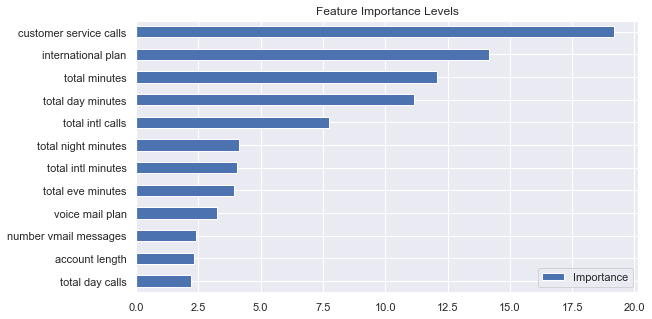

In [57]:
# Create DataFrame of our important features and sort by importance
Importance =pd.DataFrame({"Importance": gb_final_model.feature_importances_*100},index = X_train_re.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(12).plot(kind ="barh", color = "b",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

Importance is the amount that each feature split improves the performance and weighted by the number of observations in that node. 

Our final model shows that:
1. Customer service calls has the highest importance with ~24%. Clients upset or have an unresolved issue will make higher volume of service calls.
2. Total minutes is second highest with ~14% showing that their usage during the day is effecting in some way.
3. International plan with ~13% is also high showing that subscribing to the international plan has an effect on whether the client churns.

In [61]:
# Print the classification report of validation/test predictions along with Confidence Matrix
print(classification_report(y_val, y_pred_val, target_names=['0', '1']))
print(classification_report(y_test, y_pred_test, target_names=['0', '1']))
cm = confusion_matrix(y_val, y_pred_val) # Create confusion matrix 
# Plot confusion matrix
plt.figure(figsize=(12,8)) 
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Final Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       187
           1       0.83      0.68      0.75        22

    accuracy                           0.95       209
   macro avg       0.90      0.83      0.86       209
weighted avg       0.95      0.95      0.95       209

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       522
           1       0.90      0.83      0.86       103

    accuracy                           0.96       625
   macro avg       0.94      0.90      0.92       625
weighted avg       0.96      0.96      0.96       625



Confusion Matrix and Performance:
1. Based on our final classification model our recall score on the validation set is 0.77. That means that we classified a false negative 23% of the time. 
2. We are able to identify 17 clients who will churn who we would otherwise have lost. Though we misclassified 4 people as churning when they would not have the cost of keeping a client outway the cost of losing a client.
3. Our model was only unable to predict 5 clients that churned.

## Conclusion
---
### Analysis
We learned alot about client churn for SyriaTel Telecommunications:
1. We learned that clients in California, New Jersey, and Texas have the highest churn rate.
2. Clients with international plans had a higher churn rate than those that don't while clients with a voice mail plan had a lower churn rate than those that don't.
3. Gradient Boosting Classifier was our best performing model and through hyperparameter tuning we found that the exponential loss function with max depth of 5 and max features of 12 provides the best model when measuring the recall score.
4. Our 3 most important features in our classification model are "customer service calls", "total minutes", and "international plan". These are the features that split our observations most effectively.
5. The best model had a recall score of 0.77 on the validation set predictions. With this model we missed 5 clients who will churn out of the 22 total. 
<br><br>

### Next Steps
Our business goal is to understand clients who churn to have an opportunity to retain them as clients as well as improve our own services. Our next steps are to:
1. We should look into our international plan and understand why that has an effect on clients that churn. Sending a survey to our clients who have an international plan to understand what they think of it can improve our services.
2. Using our model we can predict clients that will churn and provide a discount or special offer to retain their business. We can also use that opportunity to understand more about why they were going to cancel our service.